# PART I - Classification Model From Semester A
#####  @ Haim Goldfisher

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

## KNN was the most accurate model for this dataset, with 98.7 % of success.


## If you like to jump into the improved model, click here <a href=#bookmark>Data Visualization - Semester B</a>

# DATASET : Wine Type Classification

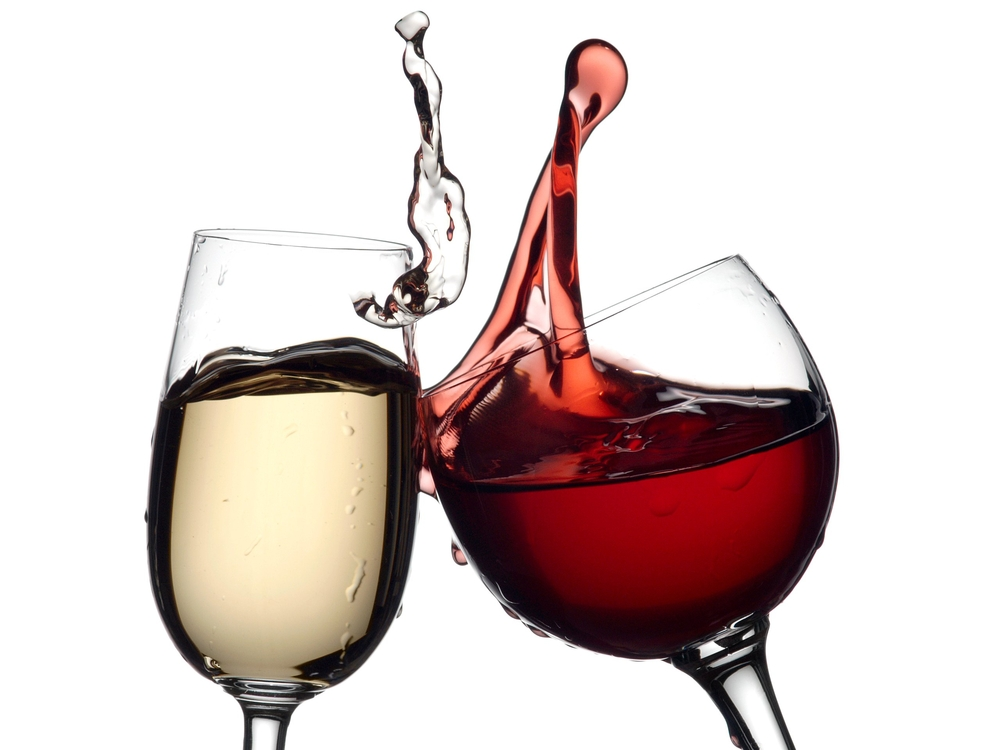

### Quick review:
##### Link to the dataset: https://www.kaggle.com/ahmettezcantekin/beginner-datasets
I Chose wine as my dataset. I would like to create a model which will predict the type of the wine(red/white), according to it's features.
At first, I thought that this model might be a little stupid. We have eyes, we also have mouth. There is no problem to recognize the difference between white and red wine. However, a model has no senses. It can't taste the wine or see it color. The idea that we can use only data to predict at first the color of the wine, and after it to connect person to specific wine, is a big thing. This model may looks a little boring to you, but to me it is the first step of a long journey.

Firstly, we will upload the dataset:

In [2]:
wine = pd.read_csv('C:\Haim\Anaconda\wine.csv')

wine # display the first and last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Explantion for the features:
- **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
- **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines.
- **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **chlorides:** the amount of salt in the wine.
- **free sulfur dioxide:** the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- **total sulfur dioxide:** amount of free and bound forms of $SO_2$; in low concentrations, $SO_2$ is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, $SO_2$ becomes evident in the nose and taste of wine.
- **density:** the density of water is close to that of water depending on the percent alcohol and sugar content.
- **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- **sulphates:** a wine additive which can contribute to sulfur dioxide gas $(SO_2)$ levels, wich acts as an antimicrobial and antioxidant.
- **alcohol:** the percent alcohol content of the wine.
- **quality:** score between 0 and 10.
- **type:** red/white.


In [3]:
wine.info() # we would like to see if we have null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine.shape # 6497 rows and 13 columns

(6497, 13)

In [5]:
wine.isnull().sum() #for NaN

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
wine.duplicated().sum() # duplicates may point on the same wine, it can make our model unstable

1177

We have 1,177 duplicated rows, we can infer that it referrence to the same wine. Let's drop those rows for better results for our model.

In [7]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [8]:
wine.shape # 5320 rows and 13 columns

(5320, 13)

At first, we had 6,497 rows. Now we have 5,320 rows.

In [9]:
count_cat = wine.nunique() # it shows us how much unique examples we have in each feature

In [10]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

It let us understand how much "categories" we have for each column.

In [11]:
wine["type"].value_counts() # it let us understand the number of the examples we have in the dataset

white    3961
red      1359
Name: type, dtype: int64

In [12]:
# The distribution of the examples in our dataset
wine["type"].value_counts("white")*100 # in %
wine["type"].value_counts("red")*100 # in %

white    74.454887
red      25.545113
Name: type, dtype: float64

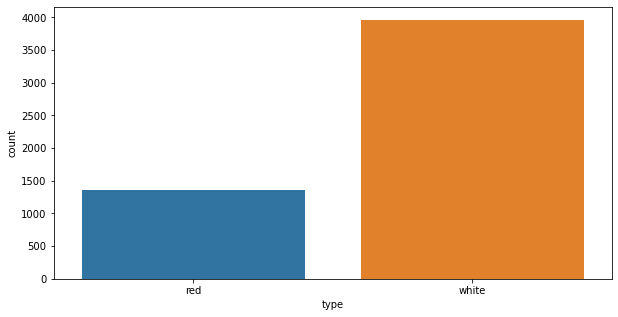

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = wine['type']); # we will plot it for better illustration

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.

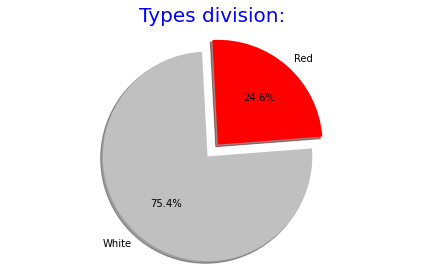

In [14]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

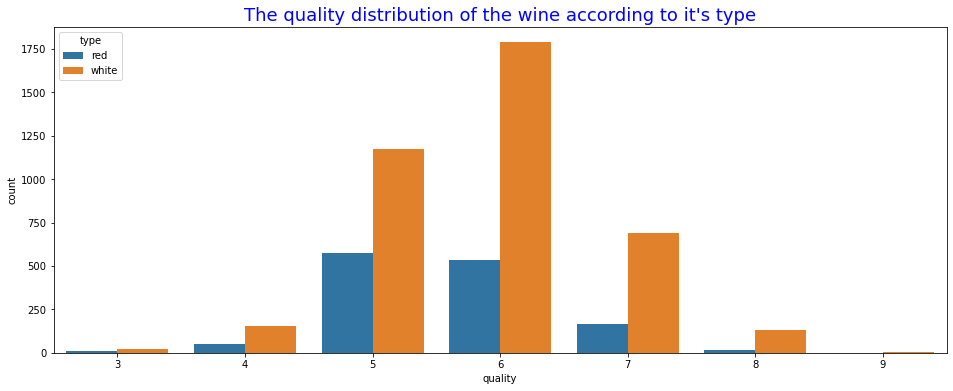

In [15]:
# another plot to show us more intersting details about the dataset
plt.figure(figsize = (16,6))
plt.title("The quality distribution of the wine according to it's type", size=18, color='b')
sns.countplot(wine['quality'], hue = wine['type']);

We can see that we have some quality for each wine. Let's take a look on it:

In [16]:
wine["quality"].value_counts() # the amount of wine we have from each quality number

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

We can also display this by a dataframe:

In [17]:
red_per_quality = wine.loc[wine["type"]=='red']["quality"].value_counts() # only the red wine, the sum is sorted by quality
white_per_quality = wine.loc[wine["type"]=='white']["quality"].value_counts() # only white...
quality_dist = pd.DataFrame({ # new df for our two new series
        'red': red_per_quality,
        'white':white_per_quality})
quality_dist.fillna(value = 0, inplace=True) # if we dont have any data = we dont't have wine from that quality

quality_dist

,red,white
3,10.0,20
4,53.0,153
5,577.0,1175
6,535.0,1788
7,167.0,689
8,17.0,131
9,0.0,5


We can also take only the red wine which it's quality is 6:

In [18]:
red_wine = wine.loc[wine["type"]=='red'] # we chose only red wine
red_wine_5 = red_wine.loc[red_wine["quality"]==6] # we chose only quality 6
red_wine_5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,red
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,red
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6,red
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,red
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red


Let's try something else, we will groupby the wine into type groups to see which one has a greater quality:

In [19]:
df_types = wine.groupby('type') #by type
df_types

In [20]:
df_types.quality.mean() # the mean of the quality for each type

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [21]:
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type'])
# red = 0
# white = 1

<ipython-input-21-1ca5644f765f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['type'] = encoder.fit_transform(wine['type'])


In [22]:
wine["type"].value_counts()

1    3961
0    1359
Name: type, dtype: int64

In [23]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


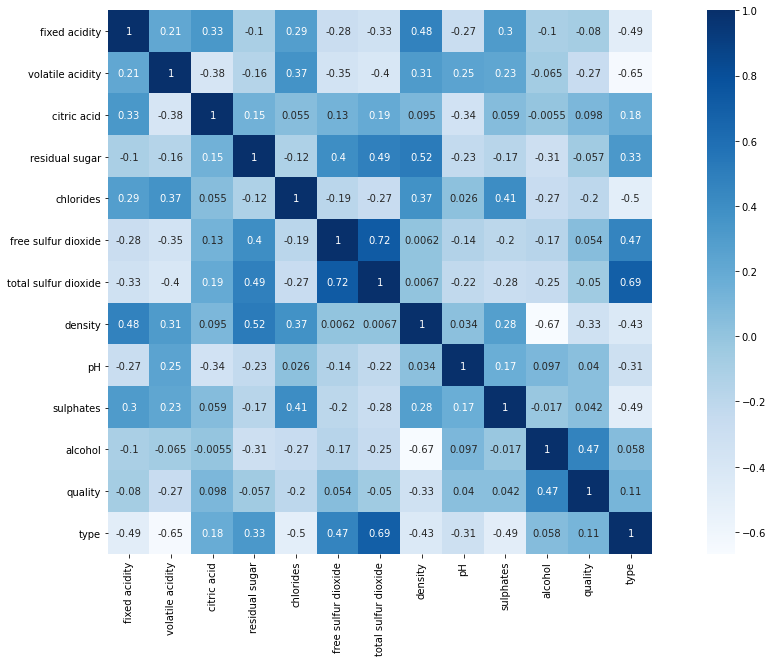

In [24]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Blues");

Heatmap is a super important tool, because it tells us the bigger story.
As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7 of correalation). free sulfur dioxide takes the 2nd place with 0.47 of correalation. After it, the residual sugar with 0.35 of correalation.
Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

We would like to see the impact of total sulfur dioxide, free sulfur dioxide and residual sugar on the wine's type. Let's go back to the graphs.

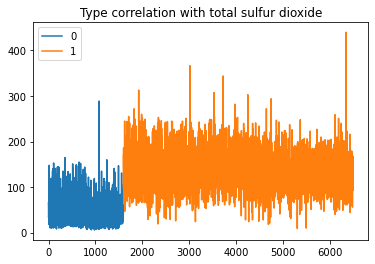

In [25]:
wine.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);
# the most important thing here is to watch the difference between the red and white wine
# we can also see that there are a few outliers 

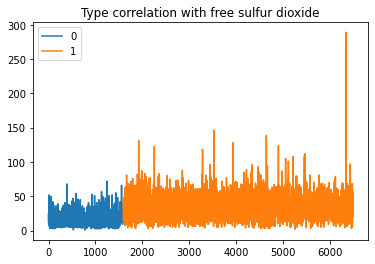

In [26]:
wine.groupby('type')['free sulfur dioxide'].plot(title="Type correlation with free sulfur dioxide", legend=True);

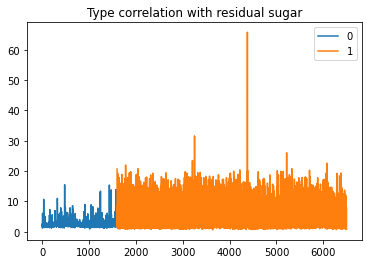

In [27]:
wine.groupby('type')['residual sugar'].plot(title="Type correlation with residual sugar", legend=True);

In [28]:
wine.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# Scaling

In [29]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

<ipython-input-29-af99e9ace4b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = ss.fit_transform(df[features])
C:\Haim\Anaconda\Python\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,0
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,0


In [30]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

### Training - Testing split

In [31]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

The default split is 75% train , 25% test.

In [32]:
X_train.shape # 3990 rows, 12 columns

(3990, 12)

In [33]:
X_test.shape # 1330 rows, 12 columns

(1330, 12)

In [34]:
y_train.shape # 3990 rows, one column

(3990,)

In [35]:
y_test.shape # 1330 rows, one columns

(1330,)

# Dummy Classifier

#### Our model must be better than this model.

In [36]:
# our options: 'most_frequent', 'stratified', 'uniform', 'constant', 'prior')
# I chose the best dummy classifier from all those options (please, believe me)

dm = DummyClassifier(strategy='most_frequent', random_state=0)
# random_state = 0 assure the result will be the same every time we run the model (no random results)
dm.fit(X_train,y_train) # training the model
dm

DummyClassifier(random_state=0, strategy='most_frequent')

In [37]:
y_pred = dm.predict(X_test) # predict the result

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.75      1.00      0.85       992

    accuracy                           0.75      1330
   macro avg       0.37      0.50      0.43      1330
weighted avg       0.56      0.75      0.64      1330



C:\Haim\Anaconda\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The most frequent strategy goes always after the majority. In our case, that every wine is white, because 75% of the wine is white.

Here's a reminder for a confusion matrix values:

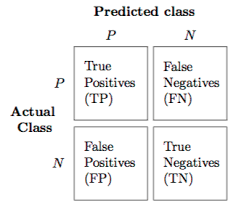

Text(33.0, 0.5, 'Actual')

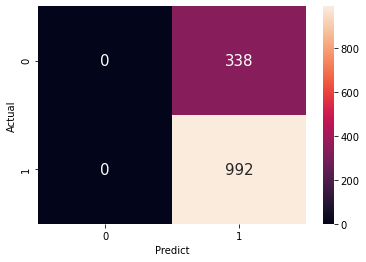

In [39]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

#### A graph showing the performance of an ambiguous classifier, due to the decision threshold set for it. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) under different acceptance thresholds.

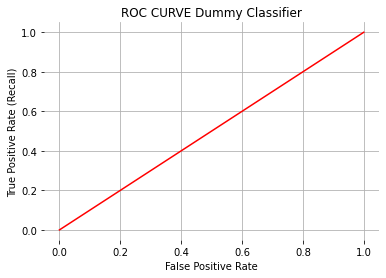

The score for the ROC Curve is: 50.0%


In [40]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='r')
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# KNN - K-Nearest Neighbors

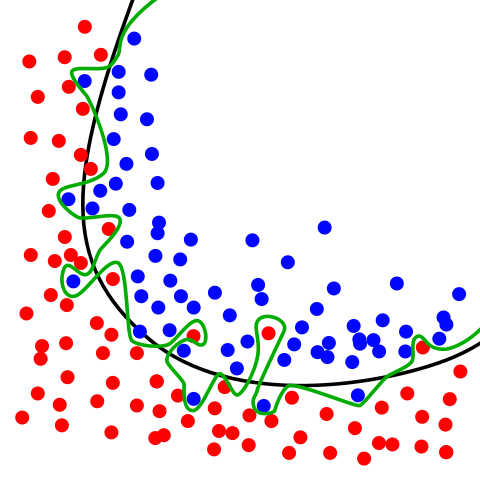

#### The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



### Cross validation:

#### The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.


##### For illustration:

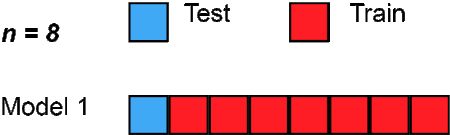

In [44]:
k_range = list(range(3,51)) # we will test k values in range 3-50
weight_op = ['uniform', 'distance'] # we will test the knn methods uniform & distance
d = {'n_neighbors' :k_range, 'weights': weight_op}

In [45]:
grid_temp = GridSearchCV(knn, d, cv=10, scoring='accuracy') # we chose model, d(range, methods), num of cv groups and scoring method
grid_temp.fit(data, target)
print("score:",grid_temp.best_score_," params:",grid_temp.best_params_)

score: 0.9930451127819551  params: {'n_neighbors': 6, 'weights': 'distance'}


As we can see, the grid search found the ideal k (6) and knn strategy (distance) for us. Let's use them for better performance for our model.

In [46]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [47]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [48]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

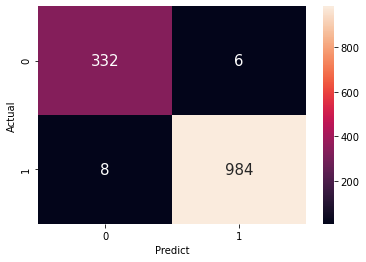

In [49]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

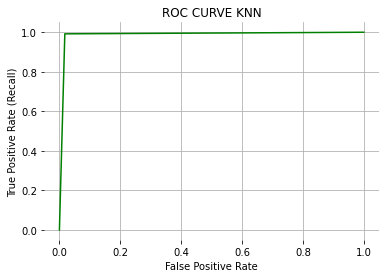

The score for the ROC Curve is: 98.7%


In [50]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='g')
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Decision Tree

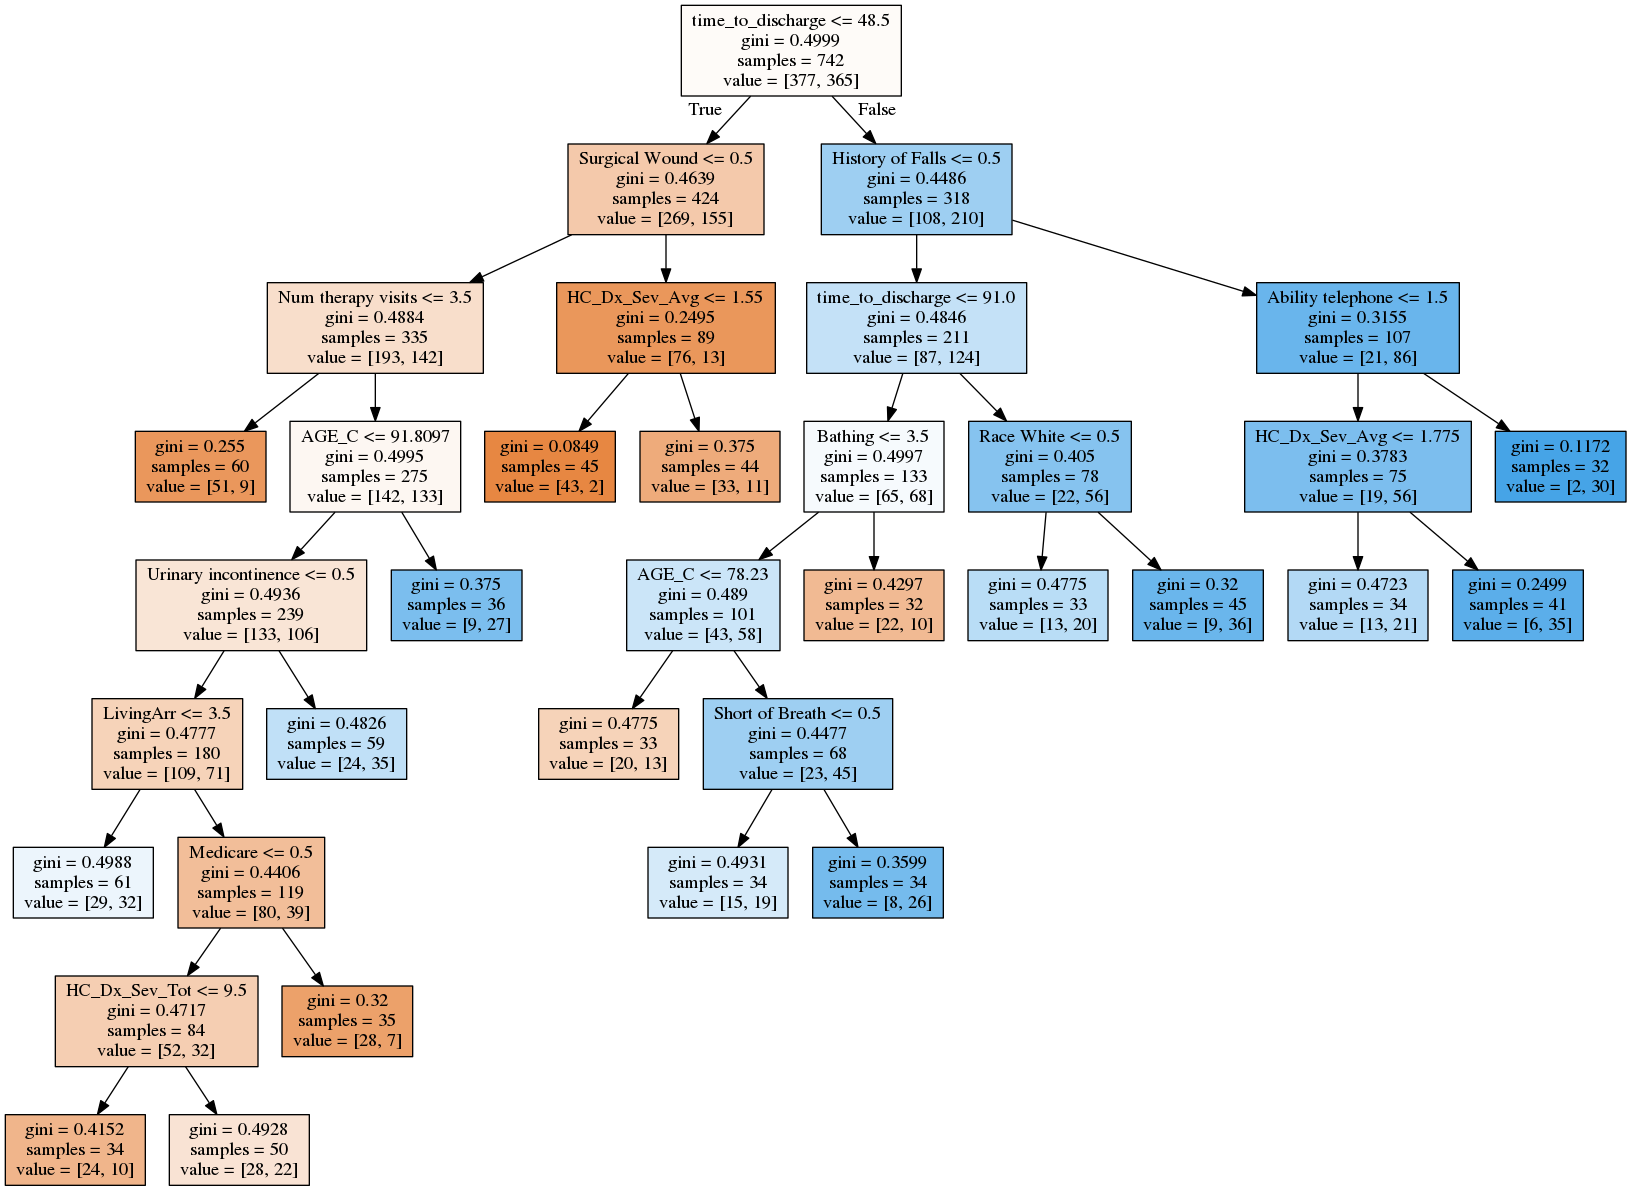

#### A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Criterion is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Splitter is the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [51]:
dct = DecisionTreeClassifier(random_state=0) # gini and best are the default
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(random_state=0)

In [52]:
y_pred = dct.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.98      0.97      1330
weighted avg       0.98      0.98      0.98      1330



α (alpha) is a tuning parameter that we finding using cross validation.

In [54]:
path = dct.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
impurities = path.impurities
# it returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
alphas

array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
       2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
       3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
       4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
       4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
       7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
       9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
       1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
       1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
       6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
       2.39582664e-01])

In [55]:
d = {'ccp_alpha':alphas}
d

{'ccp_alpha': array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
        2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
        3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
        4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
        4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
        7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
        9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
        1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
        1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
        6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
        2.39582664e-01])}

### Cross validation:

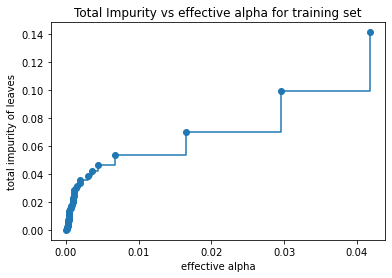

In [56]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");
#  as alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

In [57]:
grid_dct = GridSearchCV(dct, d, cv=10, scoring='accuracy')
grid_dct.fit(data, target)
print("score:", grid_dct.best_score_, " params:", grid_dct.best_params_)

score: 0.9800751879699249  params: {'ccp_alpha': 0.0004761904761904761}


As we can see, the grid search found the optimal alpha for us. We will use that alpha to improve our model results

In [58]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train, y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [59]:
y_pred = dct.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       338
           1       0.99      0.98      0.98       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



Text(33.0, 0.5, 'Actual')

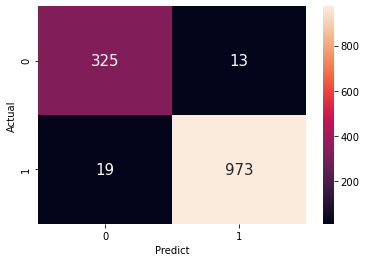

In [61]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

Let's take a look at the decision tree of our model:

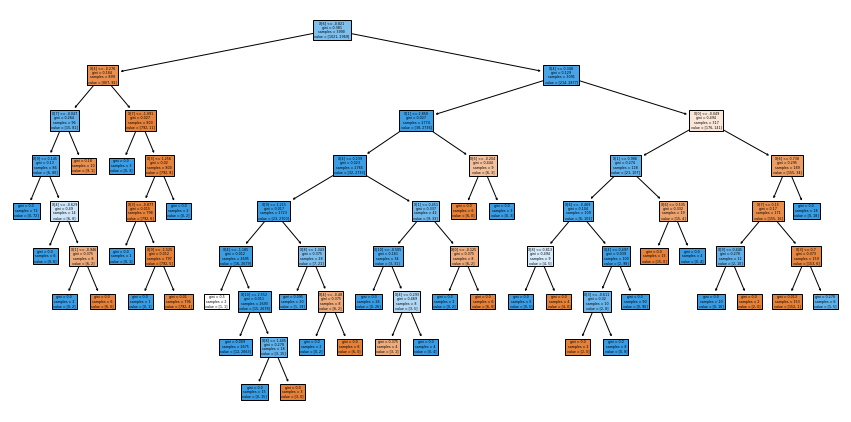

In [62]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

## ROC Curve

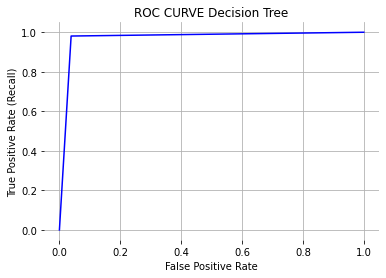

The score for the ROC Curve is: 97.1%


In [63]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='b')
plt.box(False)
plt.title('ROC CURVE Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Logistic Regression

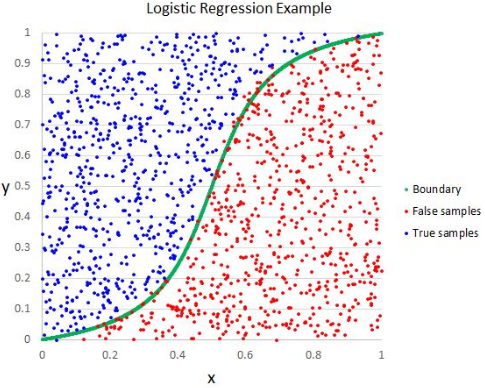

#### A statistical model that describes a possible relationship between a qualitative / categorical variable, known as the "explained variable", and other variables called "explanatory variables". The explanatory variables can be qualitative or quantitative. The model makes it possible to estimate the extent of the effect of a change in its value on each of the variables that explain the value of the explained variable. In other words, the model makes it possible to estimate correlations between the explanatory variables and the explained variable.

In [64]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.98      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

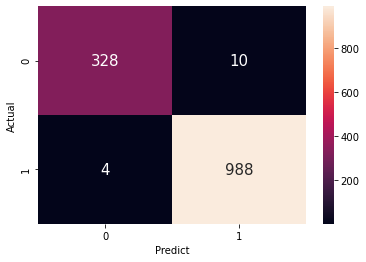

In [66]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

In [67]:
print(metrics.accuracy_score(y_test, predictions))

0.9894736842105263


## ROC Curve

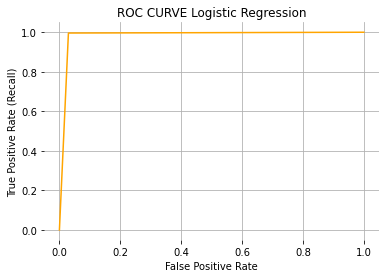

The score for the ROC Curve is: 98.3%


In [68]:
fpr, tpr, _= roc_curve(y_test, predictions)
auc= roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc), color='orange')
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Conclusion

In [69]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       50.0 %
KNN:                   98.7 %
Decision Tree:         97.1 %
Logistic Regression:   98.3 %


## It can be concluded that KNN is the most accurate model for our dataset, with 98.7 percentages of success.

<a name='bookmark' />



# Data Visualization: Improvement Part

#### By using new tools and new models, we would like to get a better result than 98.7% of success.

In [2]:
import warnings

# new models:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

#from sklearn.linear_model import RidgeCV
#from sklearn.svm import LinearSVR

# A model that I learned by myself: CatBoost + Plotly

from catboost import CatBoostClassifier
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# Clustering:

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

#PCA:

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

#Scaling:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
wine_df = pd.read_csv('C:\Haim\Anaconda\wine.csv')

wine_df.sample(n = 5, random_state = 123).sort_values(by = 'type') # 5 random samples from the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1321,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red
547,10.6,0.31,0.49,2.50,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6,red
2767,7.2,0.20,0.38,1.00,0.037,21.0,74.0,0.99180,3.21,0.37,11.0,5,white
5069,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,white
5780,6.6,0.25,0.32,5.60,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6,white


describe per type:

In [4]:
wine_df[wine_df['type']=='red'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_df[wine_df['type']=='white'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


according to the article https://towardsdatascience.com/how-to-reduce-the-size-of-a-pandas-dataframe-in-python-7ed6e4269f88, we will reduce the size of the Dataframe:

In [6]:
wine_df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 999.5 KB


In [7]:
## downcasting loop
for column in wine_df:
    if wine_df[column].dtype == 'float64':
        wine_df[column]=pd.to_numeric(wine_df[column], downcast='float')
    if wine_df[column].dtype == 'int64':
        wine_df[column]=pd.to_numeric(wine_df[column], downcast='integer')
## dropping an unused column
#df = df.drop('item_name',axis =1)

In [8]:
wine_df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   float32
 6   total sulfur dioxide  6497 non-null   float32
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int8   
 12  type                  6497 non-null   object 
dtypes: float32(11), int8(1), object(1)
memory usage: 675.9 KB


##### We will convert 'red'/'white' wine type to 1/0:

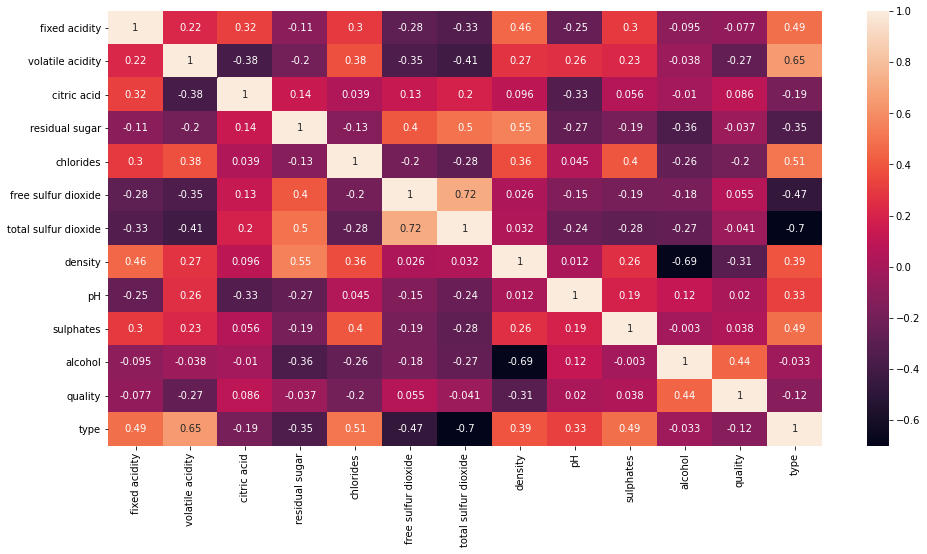

In [9]:
corr = wine_df

mapper = {'red':1, 'white':0}
corr['type'] = corr.type.map(mapper)

plt.figure(figsize=(16, 8))
sns.heatmap(corr.corr(), square=False, annot=True);

In [10]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {1:'red', 0:'white'}
    labeled = label.map(mapping)
    return labeled

### Data/Target Split:

In [51]:
target = wine_df['type'] # the feature we would like to predict, the type of the wine
data = wine_df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it

### Training / Testing Split:

In [52]:
X_train,X_test,y_train,y_test = train_test_split(data, target, random_state=18)

## Data Processing

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Dimensionality Reduction by PCA:

We would like to use PCA for dimensionality reduction:

In [54]:
# I want to understand how reduction of features will harm the understanding of the data:

pca = PCA() # all 784 features
pca.fit(X_train)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Features", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

Choosing our PCA value:

In [55]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
pca.n_components_

9

#### We can see that the reduction of the dimentions didn't hurt the understanding of the data. We can use 3 dimentions instead of 12 and still have 99.9% of explained data.

In [56]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_train_reduced, x=0, y=1, z=2, color = num_to_name(y_train),
    color_discrete_sequence=["red", "grey"],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [57]:
# 2D version:

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=0, y=1, color = num_to_name(y_train),
    color_discrete_sequence=["red", "grey"],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

##### Updating X_train & X_test after dimentionality reduction:

In [58]:
X_train = pd.DataFrame(X_train_reduced)
X_test = pd.DataFrame(X_test_reduced)

# Models

## KNN:

In [59]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.9932307692307693

In [60]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1221
           1       0.98      0.99      0.99       404

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



## Logistic Regression:

In [61]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.9895384615384616

In [62]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1221
           1       0.98      0.98      0.98       404

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.99      1625
weighted avg       0.99      0.99      0.99      1625



## Random Forest:

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.9901538461538462

In [64]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1221
           1       0.98      0.98      0.98       404

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



## AdaBoost:

In [66]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred)
ada_acc

0.9864615384615385

In [67]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1221
           1       0.98      0.97      0.97       404

    accuracy                           0.99      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625



## XGBoosting:

In [70]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc

[18:14:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9926153846153846

In [71]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1221
           1       0.98      0.99      0.99       404

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



## CatBoost:

In [68]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
cat_acc = accuracy_score(y_test, y_pred)
cat_acc

Learning rate set to 0.020257
0:	learn: 0.6532469	total: 57.1ms	remaining: 57.1s
1:	learn: 0.6145637	total: 60.7ms	remaining: 30.3s
2:	learn: 0.5779600	total: 64.1ms	remaining: 21.3s
3:	learn: 0.5416419	total: 67.8ms	remaining: 16.9s
4:	learn: 0.5087122	total: 71.3ms	remaining: 14.2s
5:	learn: 0.4778195	total: 74.8ms	remaining: 12.4s
6:	learn: 0.4508548	total: 78ms	remaining: 11.1s
7:	learn: 0.4248413	total: 81.8ms	remaining: 10.1s
8:	learn: 0.3988021	total: 85.6ms	remaining: 9.42s
9:	learn: 0.3753426	total: 89.1ms	remaining: 8.82s
10:	learn: 0.3531961	total: 92.6ms	remaining: 8.33s
11:	learn: 0.3310952	total: 96.1ms	remaining: 7.91s
12:	learn: 0.3114909	total: 99.8ms	remaining: 7.58s
13:	learn: 0.2920088	total: 103ms	remaining: 7.27s
14:	learn: 0.2758318	total: 107ms	remaining: 7.01s
15:	learn: 0.2600305	total: 110ms	remaining: 6.77s
16:	learn: 0.2454420	total: 114ms	remaining: 6.59s
17:	learn: 0.2314029	total: 118ms	remaining: 6.42s
18:	learn: 0.2191811	total: 121ms	remaining: 6.26s


183:	learn: 0.0251111	total: 713ms	remaining: 3.16s
184:	learn: 0.0250218	total: 716ms	remaining: 3.16s
185:	learn: 0.0249566	total: 720ms	remaining: 3.15s
186:	learn: 0.0248928	total: 723ms	remaining: 3.14s
187:	learn: 0.0248101	total: 726ms	remaining: 3.14s
188:	learn: 0.0247593	total: 730ms	remaining: 3.13s
189:	learn: 0.0246176	total: 734ms	remaining: 3.13s
190:	learn: 0.0245280	total: 737ms	remaining: 3.12s
191:	learn: 0.0244786	total: 741ms	remaining: 3.12s
192:	learn: 0.0244137	total: 744ms	remaining: 3.11s
193:	learn: 0.0243355	total: 748ms	remaining: 3.11s
194:	learn: 0.0242458	total: 752ms	remaining: 3.1s
195:	learn: 0.0241970	total: 757ms	remaining: 3.1s
196:	learn: 0.0241230	total: 761ms	remaining: 3.1s
197:	learn: 0.0240555	total: 764ms	remaining: 3.09s
198:	learn: 0.0239913	total: 767ms	remaining: 3.09s
199:	learn: 0.0239380	total: 771ms	remaining: 3.08s
200:	learn: 0.0238579	total: 775ms	remaining: 3.08s
201:	learn: 0.0238148	total: 778ms	remaining: 3.07s
202:	learn: 0.0

385:	learn: 0.0147615	total: 1.42s	remaining: 2.26s
386:	learn: 0.0147245	total: 1.42s	remaining: 2.25s
387:	learn: 0.0146819	total: 1.43s	remaining: 2.25s
388:	learn: 0.0146482	total: 1.43s	remaining: 2.25s
389:	learn: 0.0146262	total: 1.43s	remaining: 2.24s
390:	learn: 0.0145883	total: 1.44s	remaining: 2.24s
391:	learn: 0.0145643	total: 1.44s	remaining: 2.24s
392:	learn: 0.0145314	total: 1.45s	remaining: 2.23s
393:	learn: 0.0144720	total: 1.45s	remaining: 2.23s
394:	learn: 0.0144399	total: 1.46s	remaining: 2.23s
395:	learn: 0.0144233	total: 1.46s	remaining: 2.22s
396:	learn: 0.0143968	total: 1.46s	remaining: 2.22s
397:	learn: 0.0143638	total: 1.47s	remaining: 2.22s
398:	learn: 0.0143230	total: 1.47s	remaining: 2.21s
399:	learn: 0.0142835	total: 1.47s	remaining: 2.21s
400:	learn: 0.0142550	total: 1.48s	remaining: 2.21s
401:	learn: 0.0142333	total: 1.48s	remaining: 2.2s
402:	learn: 0.0141841	total: 1.48s	remaining: 2.2s
403:	learn: 0.0141573	total: 1.49s	remaining: 2.19s
404:	learn: 0.

570:	learn: 0.0101657	total: 2.12s	remaining: 1.59s
571:	learn: 0.0101452	total: 2.12s	remaining: 1.59s
572:	learn: 0.0101354	total: 2.13s	remaining: 1.58s
573:	learn: 0.0101156	total: 2.13s	remaining: 1.58s
574:	learn: 0.0101044	total: 2.13s	remaining: 1.58s
575:	learn: 0.0100928	total: 2.13s	remaining: 1.57s
576:	learn: 0.0100747	total: 2.14s	remaining: 1.57s
577:	learn: 0.0100567	total: 2.14s	remaining: 1.56s
578:	learn: 0.0100472	total: 2.15s	remaining: 1.56s
579:	learn: 0.0100258	total: 2.15s	remaining: 1.56s
580:	learn: 0.0100161	total: 2.15s	remaining: 1.55s
581:	learn: 0.0100014	total: 2.16s	remaining: 1.55s
582:	learn: 0.0099735	total: 2.16s	remaining: 1.55s
583:	learn: 0.0099645	total: 2.17s	remaining: 1.54s
584:	learn: 0.0099517	total: 2.17s	remaining: 1.54s
585:	learn: 0.0099326	total: 2.17s	remaining: 1.54s
586:	learn: 0.0099138	total: 2.18s	remaining: 1.53s
587:	learn: 0.0098922	total: 2.19s	remaining: 1.53s
588:	learn: 0.0098833	total: 2.19s	remaining: 1.53s
589:	learn: 

753:	learn: 0.0076668	total: 2.82s	remaining: 919ms
754:	learn: 0.0076605	total: 2.82s	remaining: 915ms
755:	learn: 0.0076557	total: 2.82s	remaining: 911ms
756:	learn: 0.0076404	total: 2.83s	remaining: 908ms
757:	learn: 0.0076307	total: 2.83s	remaining: 904ms
758:	learn: 0.0076230	total: 2.83s	remaining: 900ms
759:	learn: 0.0076139	total: 2.84s	remaining: 896ms
760:	learn: 0.0076091	total: 2.84s	remaining: 892ms
761:	learn: 0.0075850	total: 2.85s	remaining: 889ms
762:	learn: 0.0075774	total: 2.85s	remaining: 885ms
763:	learn: 0.0075683	total: 2.85s	remaining: 881ms
764:	learn: 0.0075553	total: 2.86s	remaining: 877ms
765:	learn: 0.0075462	total: 2.86s	remaining: 874ms
766:	learn: 0.0075336	total: 2.86s	remaining: 870ms
767:	learn: 0.0075240	total: 2.87s	remaining: 866ms
768:	learn: 0.0075197	total: 2.87s	remaining: 862ms
769:	learn: 0.0075087	total: 2.87s	remaining: 859ms
770:	learn: 0.0074933	total: 2.88s	remaining: 855ms
771:	learn: 0.0074846	total: 2.88s	remaining: 851ms
772:	learn: 

937:	learn: 0.0059489	total: 3.52s	remaining: 233ms
938:	learn: 0.0059421	total: 3.53s	remaining: 229ms
939:	learn: 0.0059367	total: 3.53s	remaining: 225ms
940:	learn: 0.0059239	total: 3.53s	remaining: 222ms
941:	learn: 0.0059199	total: 3.54s	remaining: 218ms
942:	learn: 0.0059171	total: 3.54s	remaining: 214ms
943:	learn: 0.0059058	total: 3.55s	remaining: 210ms
944:	learn: 0.0059004	total: 3.55s	remaining: 207ms
945:	learn: 0.0058976	total: 3.55s	remaining: 203ms
946:	learn: 0.0058923	total: 3.56s	remaining: 199ms
947:	learn: 0.0058900	total: 3.56s	remaining: 195ms
948:	learn: 0.0058775	total: 3.57s	remaining: 192ms
949:	learn: 0.0058658	total: 3.57s	remaining: 188ms
950:	learn: 0.0058609	total: 3.58s	remaining: 184ms
951:	learn: 0.0058553	total: 3.58s	remaining: 180ms
952:	learn: 0.0058515	total: 3.58s	remaining: 177ms
953:	learn: 0.0058493	total: 3.59s	remaining: 173ms
954:	learn: 0.0058472	total: 3.59s	remaining: 169ms
955:	learn: 0.0058445	total: 3.59s	remaining: 165ms
956:	learn: 

0.9950769230769231

In [69]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       0.99      0.99      0.99       404

    accuracy                           1.00      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



# Conclusion

In [74]:
acc_list = {'Model':  ['KNN', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'XGBoost', 'CatBoost'],
        'Accuracy': [knn_acc,lr_acc,rf_acc,ada_acc,xgb_acc,cat_acc],
        }

In [81]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=acc_list['Model'], y=acc_list['Accuracy'],text=np.round(acc_list['Accuracy'],2),textposition='outside',marker_color=['darkgreen', 'blue', 'red', 'purple', 'orange', 'yellow']
          ),
])
fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show()

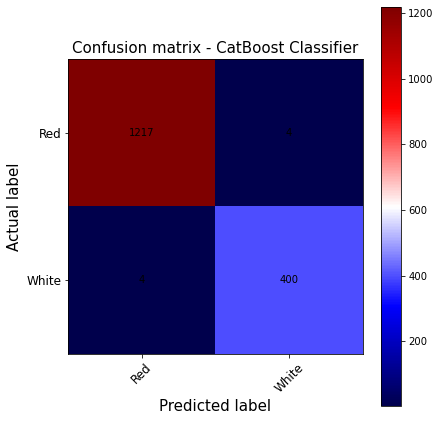

In [91]:
# confusion matrix for our best model

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.seismic)
plt.title('Confusion matrix - CatBoost Classifier', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Red','White'], rotation=45, size = 12)
plt.yticks(tick_marks, ['Red','White'], size = 12)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# CatBoost was the best model : 99.5 %

#### We had 98.7 % from KNN last semester. Now we have 99.5 % of success by using PCA and ensemble learning algorithm - CatBoost.